In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from topoflow.components import met_base, snow_degree_day 

In [15]:
met, sno = met_base.met_component(), snow_degree_day.snow_component()
cfg_file_met='topoflow/examples/Treynor_Iowa/June_20_67_meteorology.cfg'
cfg_file_sno='topoflow/examples/Treynor_Iowa/June_20_67_snow_degree_day.cfg'

In [25]:
met.initialize(cfg_file_met);

sno.P_snow=met.get_values('atmosphere_water__snowfall_leq-volume_flux')
sno.rho_H2O=met.get_values('water-liquid__mass-per-volume_density')
sno.T_air=met.get_values('atmosphere_bottom_air__temperature')

sno.initialize(cfg_file_sno);

 
Meteorology component: Initializing...
Scalar rainrate set to: 5.55555555556e-05  [mmph]
SORRY: Cannot yet create lon and lat grids for
       this DEM because it uses UTM coordinates.
       Will use lat/lon for Denver, Colorado.
 
Imported netCDF4 version: 1.1.9
 
Snow component: Initializing...
Imported netCDF4 version: 1.1.9


In [26]:
time_met = [met.get_current_time().copy()]
time_sno = [sno.get_current_time().copy()]
# NOTE: EMELI does not have get_value
h_snow = [sno.get_values('snowpack__depth').copy()] 
Q_sum = [met.get_values('land_surface_net-total-energy__energy_flux').copy()]
T_surf = [met.get_values('land_surface__temperature').copy()]

print 't_met_end=', met.get_end_time(), ', t_sn_end=', sno.get_end_time()
while met.get_current_time() < met.get_end_time():
    print 'met_t=',met.get_current_time(), ', sno_t=',sno.get_current_time()
    
    # set req. parameters -> update -> save cur time
    met.h_snow=sno.get_values('snowpack__depth')
    met.update()
    time_met.append(met.get_current_time().copy())
    T_surf.append(met.T_surf.copy() )
    Q_sum.append(met.Q_sum.copy() )

    
    sno.P_snow=met.get_values('atmosphere_water__snowfall_leq-volume_flux')
    sno.rho_H2O=met.get_values('water-liquid__mass-per-volume_density')
    sno.T_air=met.get_values('atmosphere_bottom_air__temperature')
    sno.update()
    h_snow.append(sno.h_snow.copy() )
    time_sno.append(sno.get_current_time().copy())

    
print np.shape(h_snow), np.shape(T_surf), np.shape(Q_sum)

t_met_end= 600.0 , t_sn_end= 36000.0
met_t= 0.0 , sno_t= 0.0
met_t= 60.0 , sno_t= 3600.0
met_t= 120.0 , sno_t= 7200.0
met_t= 180.0 , sno_t= 10800.0
met_t= 240.0 , sno_t= 14400.0
met_t= 300.0 , sno_t= 18000.0
met_t= 360.0 , sno_t= 21600.0
met_t= 420.0 , sno_t= 25200.0
met_t= 480.0 , sno_t= 28800.0
met_t= 540.0 , sno_t= 32400.0
(11,) (11,) (11, 44, 29)


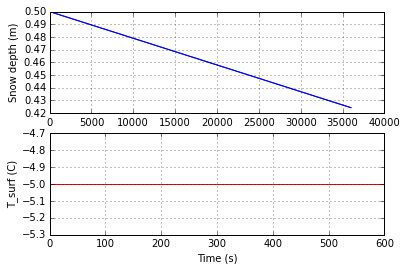

In [28]:
plt.subplot(211)
plt.plot(time_sno,h_snow,'b', time_sno,h_snow,'b'); 
plt.xlabel('Time (s)')
plt.ylabel('Snow depth (m)')
plt.grid();
plt.subplot(212)
plt.plot(time_met,T_surf,'r'); 
plt.xlabel('Time (s)')
plt.ylabel('T_surf (C)')
plt.grid(); plt.show()